# Working with Pandas

**Table of Content**

1. [Shortnames for imported packages](#sec1)
2. [The `DataFrame` Class](#sec2)
3. [Construct a dataframe from Python data structures](#sec3)
4. [Import external data](#sec4)
5. [Head and Tail](#sec5)
6. [The `describe` method](#sec6)
7. [Attached attributes: `dtypes`, `index`, `columns`](#sec7)
8. [Rename columns](#sec8)
9. [Sorting by one or more columns](#sec9)
10. [Indexing and Slicing](#sec10)
11. [Apply operations](#sec11)
12. [Creating new columns](#sec12)
13. [Deleting duplicates](#sec13)
14. [Filtering values](#sec14)
15. [Replacing values](#sec15)
16. [Dropping values](#sec16)
17. [A `groupby` example](#sec17)


**Credit:** Many of these examples are adapted from the extensive library of examples on data science by [Chris Albon](https://chrisalbon.com/). Visit the website for many more examples.

<a id="sec1"></a>
## 1. Shortnames for imported packages

There is a practice in Python to use shortnames for packages, instead of their full names. Also, instead of importing everything from a package, we refer to functions through the package name, to preserve the name space (i.e., avoid that functions with the same name override each other in the program's name space).

Thus, most pandas objects below are accessed as: `pd._object_name_`

It's a good idea to learn the conventional shortnames for all libraries that we'll use in the class.

In [3]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pandas

     ---------------------------------------- 0.0/11.6 MB ? eta -:--:--
     - -------------------------------------- 0.4/11.6 MB 12.2 MB/s eta 0:00:01
     --- ------------------------------------ 0.9/11.6 MB 11.0 MB/s eta 0:00:01
     ---- ----------------------------------- 1.2/11.6 MB 9.6 MB/s eta 0:00:02
     ----- ---------------------------------- 1.6/11.6 MB 9.5 MB/s eta 0:00:02
     ------- -------------------------------- 2.1/11.6 MB 9.5 MB/s eta 0:00:01
     -------- ------------------------------- 2.5/11.6 MB 9.4 MB/s eta 0:00:01
     ---------- ----------------------------- 3.0/11.6 MB 9.6 MB/s eta 0:00:01
     ------------ --------------------------- 3.5/11.6 MB 9.7 MB/s eta 0:00:01
     -------------- ------------------------- 4.1/11.6 MB 10.0 MB/s eta 0:00:01
     --------------- ------------------------ 4.6/11.6 MB 10.1 MB/s eta 0:00:01
     ----------------- ---------------------- 5.2/11.6 MB 10.4 MB/s eta 0:00:01
     ------------------- -------------------- 5.8/11.6

In [2]:
import pandas as pd
import numpy as np # a very useful library

C:\Users\shhwa\AppData\Local\Temp\ipykernel_38328\409801440.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


<a id="sec2"></a>
## 2. The `DataFrame` Class

The most important class in `pandas` is the `DataFrame`, which represents data as a table. We will usually store in it the "tidy tables" or data that we will eventually transform into a tidy table to do the rest of the analysis.

In [3]:
pd.DataFrame # check the nature of this object

pandas.core.frame.DataFrame

One of the most powerful Python commands is `help`. You don't need to Google! With `help` you can get useful examples to understand a data structure, a class, a method, etc. Peruse the parameters and the examples for `DataFrame` below.

In [4]:
help(pd.DataFrame)

Help on class DataFrame in module pandas.core.frame:

class DataFrame(pandas.core.generic.NDFrame, pandas.core.arraylike.OpsMixin)
 |  DataFrame(data=None, index: 'Axes | None' = None, columns: 'Axes | None' = None, dtype: 'Dtype | None' = None, copy: 'bool | None' = None) -> 'None'
 |  
 |  Two-dimensional, size-mutable, potentially heterogeneous tabular data.
 |  
 |  Data structure also contains labeled axes (rows and columns).
 |  Arithmetic operations align on both row and column labels. Can be
 |  thought of as a dict-like container for Series objects. The primary
 |  pandas data structure.
 |  
 |  Parameters
 |  ----------
 |  data : ndarray (structured or homogeneous), Iterable, dict, or DataFrame
 |      Dict can contain Series, arrays, constants, dataclass or list-like objects. If
 |      data is a dict, column order follows insertion-order. If a dict contains Series
 |      which have an index defined, it is aligned by its index. This alignment also
 |      occurs if data i

**Note:** Before converting a notebook into an HTML, comment out cells like the one below that print documentation through help, becuase in HTML format, they are collapsed and take up a lot of space in the noteboook.

<a id="sec3"></a>
## 3. Construct a dataframe from Python data structures

Because the dataframe is a table of rows and columns, to create one from scratch we need to supply it with two-dimensional data, for example a dictionary of lists, a list of dictionaries, a list of lists, etc.

### From a dictionary of lists

Notice her that each list associated with a key will become a column.

In [5]:
d = {'col1': [1, 2, 3], 
     'col2': [4, 5, 6], 
     'col3': [7, 8, 9]}
d

{'col1': [1, 2, 3], 'col2': [4, 5, 6], 'col3': [7, 8, 9]}

In [6]:
df = pd.DataFrame(data=d) # the named parameter data is optional
df

,col1,col2,col3
0,1,4,7
1,2,5,8
2,3,6,9


In [7]:
# you can create the dataframe by passing the argument directly, no need for the named parameter, try it out
e = {'col1': [1, 2, 3], 
     'col2': [4, 5, 6], 
     'col3': [7, 8, 10]}

df = pd.DataFrame(e)
df

,col1,col2,col3
0,1,4,7
1,2,5,8
2,3,6,10


### From a list of dictionaries

Dictionaries need to have the same keys. Notice that each dictionary becomes a row in the table.

In [8]:
d = [{'colA': 10, 'colB': 20}, 
     {'colA': 15, 'colB': 30}]
d

[{'colA': 10, 'colB': 20}, {'colA': 15, 'colB': 30}]

In [9]:
df2 = pd.DataFrame(data=d)
df2

,colA,colB
0,10,20
1,15,30


### From a numpy array

We will create first a 2D array (a matrix), 5x5 with random integers, using `numpy`, and then will feed that data to the DataFrame constructor.

In [10]:
matrix = np.random.randint(low=0, high=10, 
                           size=(5, 5))
matrix                  

array([[9, 3, 7, 4, 2],
       [3, 2, 6, 5, 5],
       [2, 5, 2, 8, 6],
       [9, 7, 1, 5, 6],
       [5, 1, 3, 7, 5]])

Because an array doesn't have keys that can be used as column names (see the first two examples), we need to supply them through the named parameter `columns`, see below:

In [11]:
df3 = pd.DataFrame(matrix, columns=['a', 'b', 'c', 'd', 'e'])
df3

,a,b,c,d,e
0,9,3,7,4,2
1,3,2,6,5,5
2,2,5,2,8,6
3,9,7,1,5,6
4,5,1,3,7,5


### From a list of lists (with indices and columns as parameters)

If we don't like it that the rows have indices like 0, 1, 2, etc., we can provide our own indices. Below, we first create a list of indices and columns, and then use them as values for the parameters `index` and `columns` in the `DataFrame` constructor call.

In [12]:
import string
indices = list(string.ascii_uppercase) # all the uppercase letters
columns = list(string.ascii_lowercase) # all the lowercase letters

print(indices)
print(columns)

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


In [13]:
df4 = pd.DataFrame(np.random.randint(low=0, high=100, size=(10, 10)),
                               index=indices[:10], 
                               columns=columns[:10])
df4

,a,b,c,d,e,f,g,h,i,j
A,22,4,8,31,84,69,69,90,83,83
B,4,68,84,78,97,46,42,64,75,7
C,43,57,61,54,3,4,19,74,59,8
D,52,29,87,71,79,26,43,6,44,81
E,16,80,64,89,90,89,27,95,49,11
F,14,22,57,62,37,70,50,30,46,30
G,62,35,93,2,80,22,94,42,66,2
H,13,56,35,38,2,65,79,82,35,81
I,19,85,83,72,37,5,13,80,45,25
J,8,47,38,34,90,74,51,85,26,36


As you can see, the `DataFrame` constructor is very flexible. The first parameter refers to the data that we want to store in it, but then we can provide values for the other parameters, referring them through names.

<a id="sec4"></a>
## 4. Import external data

Very frequently, we will be importing data into `pandas` from external files.

In the row below, put the cursor at the end and press the key _tab_ to see the many `read` methods that allow you to import various data formats:

**Read from a CSV file**

The most common file from which data is imported is the CSV. For the example below, we will use a CSV file with responses from a survey of CS 234 students in 2019.

In [17]:
dfStudents = pd.read_csv('survey-responses.csv')
dfStudents

,Your class year:,Your favorite number:,Your height in centimeters:,Your weight in kilogram:,Your favorite drink:,What is your favorite animal?,What is your favorite movie?,Who is your favorite woman author?
0,2020,16,167.00,59.000,Tea,Otter,The Arrival,Margaret Atwood
1,2020,17,152.00,66.000,Water,Cat,North by Northwest,Tamora Pierce
2,2021,3,157.48,53.070,Apple Cider,Whiptail Lizard,Good Will Hunting,Virginia Woolf
3,2021,7,160.00,61.000,Milk,Elephant,Catch Me if You Can,Donna Tartt
4,2020,3,165.10,70.000,Boba,Cat,Mulan,J.K. Rowling
5,2022,25,159.00,45.000,Tea,Bunny,Tangled,Maggie Stiefvater
6,2020,68,168.00,52.000,Hot chocolate,Octopus,Lord of the Rings: Two Towers,Megan Whalen Turner
7,2020,10,175.00,76.000,Water,Horse,Up,Rebecca Skloot
8,2021,7,170.00,71.000,Water,Cat,Ocean's 11,Agatha Christie
9,2021,13,163.00,54.500,Coffee,Cat,10 things I hate about you,J.K. Rowling


<a id="sec5"></a>
## 5. Head and Tail

You can use these two commands (`head`, `tail`) to print only a portion of the dataframe, this is usefuld when the dataframe has too many rows and you only want to look at a few.

In [18]:
dfStudents.head()

,Your class year:,Your favorite number:,Your height in centimeters:,Your weight in kilogram:,Your favorite drink:,What is your favorite animal?,What is your favorite movie?,Who is your favorite woman author?
0,2020,16,167.00,59.00,Tea,Otter,The Arrival,Margaret Atwood
1,2020,17,152.00,66.00,Water,Cat,North by Northwest,Tamora Pierce
2,2021,3,157.48,53.07,Apple Cider,Whiptail Lizard,Good Will Hunting,Virginia Woolf
3,2021,7,160.00,61.00,Milk,Elephant,Catch Me if You Can,Donna Tartt
4,2020,3,165.10,70.00,Boba,Cat,Mulan,J.K. Rowling


By default, the first (or last) five rows will be printed. But, we can control the number of printed rows:

In [19]:
dfStudents.tail(3)

,Your class year:,Your favorite number:,Your height in centimeters:,Your weight in kilogram:,Your favorite drink:,What is your favorite animal?,What is your favorite movie?,Who is your favorite woman author?
14,2021,3,181.00,79.000,Bubble Tea,French Bulldog,The Help,Ling Ma
15,2022,27,157.48,58.967,Tea,Tiger,The Godfather,Toni Morrison
16,2021,17,150.00,40.800,Water,Mouse,The Lizzie McGuire movie,J.K. Rowling


<a id="sec6"></a>
## 6. Attached attributes

The attributes `dtypes`, `index` and `columns` can be accessed individually to learn more about the dataframe:

In [20]:
dfStudents.dtypes # describes the datatype for each column
# this is helpful to know what operations you can apply on each column

Your class year:                        int64
Your favorite number:                   int64
Your height in centimeters:           float64
Your weight in kilogram:              float64
Your favorite drink:                   object
What is your favorite animal?          object
What is your favorite movie?           object
Who is your favorite woman author?     object
dtype: object

In [21]:
dfStudents.index # often, this shows the automatic indices assigned to the dataframe

RangeIndex(start=0, stop=17, step=1)

In [22]:
df4.index # this is for the dataframe we created with our own indices

Index(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'], dtype='object')

In [23]:
dfStudents.columns

Index(['Your class year:', 'Your favorite number:',
       'Your height in centimeters:', 'Your weight in kilogram:',
       'Your favorite drink:', 'What is your favorite animal?',
       'What is your favorite movie?', 'Who is your favorite woman author?'],
      dtype='object')

<a id="sec7"></a>
## 7. The `describe` method

This method provides descriptive statistics for every quantitative variable of the dataframe. It's the best way to explore the dataset in one step. Generating descriptive statistics is one of the first steps in data exploration.

In [24]:
dfStudents.describe()

,Your class year:,Your favorite number:,Your height in centimeters:,Your weight in kilogram:
count,17.000000,17.000000,17.000000,17.000000
mean,2020.764706,14.882353,165.121176,59.902176
std,0.752447,15.475312,8.587277,10.169868
min,2020.000000,3.000000,150.000000,40.800000
25%,2020.000000,7.000000,159.000000,54.500000
50%,2021.000000,11.000000,165.100000,59.000000
75%,2021.000000,17.000000,170.000000,66.000000
max,2022.000000,68.000000,181.000000,79.000000


When applied on the dataframe, the method calculates the descriptive statistics for every variable that is quantitative (in the case above, 4 variables).

One can use the method for qualitative variables as well, but the returned descriptive statistics are different. See an example below:

In [25]:
dfStudents['Your favorite drink:'].describe()

count        17
unique        8
top       Water
freq          8
Name: Your favorite drink:, dtype: object

<a id="sec8"></a>
## 8. Rename columns in a dataframe

The column names of a survey are long strings, and hard to distinguish. It is better to have some short names, which then are easy to use when we want to refer to columns in our code. To change the names, we can create a dict of pairs mapping old names to new ones and then using the `rename` method by passing the dict as a parameter.

In [26]:
names = {'Your class year:': 'classyear', 
         'Your favorite number:': 'fav_num',
         'Your height in centimeters:': 'height', 
         'Your weight in kilogram:': 'weight',
         'Your favorite drink:': 'fav_drink', 
         'What is your favorite animal?': 'fav_animal',
         'What is your favorite movie?': 'fav_movie', 
         'Who is your favorite woman author?': 'fav_author'}

dfStudents.rename(columns=names)

,classyear,fav_num,height,weight,fav_drink,fav_animal,fav_movie,fav_author
0,2020,16,167.00,59.000,Tea,Otter,The Arrival,Margaret Atwood
1,2020,17,152.00,66.000,Water,Cat,North by Northwest,Tamora Pierce
2,2021,3,157.48,53.070,Apple Cider,Whiptail Lizard,Good Will Hunting,Virginia Woolf
3,2021,7,160.00,61.000,Milk,Elephant,Catch Me if You Can,Donna Tartt
4,2020,3,165.10,70.000,Boba,Cat,Mulan,J.K. Rowling
5,2022,25,159.00,45.000,Tea,Bunny,Tangled,Maggie Stiefvater
6,2020,68,168.00,52.000,Hot chocolate,Octopus,Lord of the Rings: Two Towers,Megan Whalen Turner
7,2020,10,175.00,76.000,Water,Horse,Up,Rebecca Skloot
8,2021,7,170.00,71.000,Water,Cat,Ocean's 11,Agatha Christie
9,2021,13,163.00,54.500,Coffee,Cat,10 things I hate about you,J.K. Rowling


We can see that the column names have changed, but is that change permanent? We can print the dataframe again:

In [27]:
dfStudents.head()

,Your class year:,Your favorite number:,Your height in centimeters:,Your weight in kilogram:,Your favorite drink:,What is your favorite animal?,What is your favorite movie?,Who is your favorite woman author?
0,2020,16,167.00,59.00,Tea,Otter,The Arrival,Margaret Atwood
1,2020,17,152.00,66.00,Water,Cat,North by Northwest,Tamora Pierce
2,2021,3,157.48,53.07,Apple Cider,Whiptail Lizard,Good Will Hunting,Virginia Woolf
3,2021,7,160.00,61.00,Milk,Elephant,Catch Me if You Can,Donna Tartt
4,2020,3,165.10,70.00,Boba,Cat,Mulan,J.K. Rowling


**What is going on, why do we still have the old names?**

When we invoke a method on a dataframe object, a new object is created and the old one is preserved unchanged. We have two options at this point:

- use a new variable to store the result of a method
- change the original object

Most dataframe objects have a boolean parameter `inplace`, which controls whether the manipulation should happen to the current object or not. We can verify that with the help command:

In [28]:
help(dfStudents.rename)

Help on method rename in module pandas.core.frame:

rename(mapper: 'Renamer | None' = None, *, index: 'Renamer | None' = None, columns: 'Renamer | None' = None, axis: 'Axis | None' = None, copy: 'bool | None' = None, inplace: 'bool' = False, level: 'Level | None' = None, errors: 'IgnoreRaise' = 'ignore') -> 'DataFrame | None' method of pandas.core.frame.DataFrame instance
    Rename columns or index labels.
    
    Function / dict values must be unique (1-to-1). Labels not contained in
    a dict / Series will be left as-is. Extra labels listed don't throw an
    error.
    
    See the :ref:`user guide <basics.rename>` for more.
    
    Parameters
    ----------
    mapper : dict-like or function
        Dict-like or function transformations to apply to
        that axis' values. Use either ``mapper`` and ``axis`` to
        specify the axis to target with ``mapper``, or ``index`` and
        ``columns``.
    index : dict-like or function
        Alternative to specifying axis (``ma

Now we can try it out, we will use `inplace` instead of creating a new dataframe object. Calling `head` let's us verify that the change happened.

In [29]:
dfStudents.rename(columns=names, inplace=True)
dfStudents.head()

,classyear,fav_num,height,weight,fav_drink,fav_animal,fav_movie,fav_author
0,2020,16,167.00,59.00,Tea,Otter,The Arrival,Margaret Atwood
1,2020,17,152.00,66.00,Water,Cat,North by Northwest,Tamora Pierce
2,2021,3,157.48,53.07,Apple Cider,Whiptail Lizard,Good Will Hunting,Virginia Woolf
3,2021,7,160.00,61.00,Milk,Elephant,Catch Me if You Can,Donna Tartt
4,2020,3,165.10,70.00,Boba,Cat,Mulan,J.K. Rowling


<a id="sec9"></a>
## 9. Sorting by one or more columns

Let's look at the various columns and pick one to sort by:

In [30]:
dfStudents.head()

,classyear,fav_num,height,weight,fav_drink,fav_animal,fav_movie,fav_author
0,2020,16,167.00,59.00,Tea,Otter,The Arrival,Margaret Atwood
1,2020,17,152.00,66.00,Water,Cat,North by Northwest,Tamora Pierce
2,2021,3,157.48,53.07,Apple Cider,Whiptail Lizard,Good Will Hunting,Virginia Woolf
3,2021,7,160.00,61.00,Milk,Elephant,Catch Me if You Can,Donna Tartt
4,2020,3,165.10,70.00,Boba,Cat,Mulan,J.K. Rowling


Let's sort by **height**, by simply providing its name as a parameter to the `sort_values` method. Also, notice that we can chain multiple method calls, as shown below:

In [31]:
dfStudents.sort_values("height").head()

,classyear,fav_num,height,weight,fav_drink,fav_animal,fav_movie,fav_author
16,2021,17,150.00,40.800,Water,Mouse,The Lizzie McGuire movie,J.K. Rowling
1,2020,17,152.00,66.000,Water,Cat,North by Northwest,Tamora Pierce
2,2021,3,157.48,53.070,Apple Cider,Whiptail Lizard,Good Will Hunting,Virginia Woolf
15,2022,27,157.48,58.967,Tea,Tiger,The Godfather,Toni Morrison
5,2022,25,159.00,45.000,Tea,Bunny,Tangled,Maggie Stiefvater


Does `sort_values` change the current dataframe? We should check:

In [32]:
dfStudents.head()

,classyear,fav_num,height,weight,fav_drink,fav_animal,fav_movie,fav_author
0,2020,16,167.00,59.00,Tea,Otter,The Arrival,Margaret Atwood
1,2020,17,152.00,66.00,Water,Cat,North by Northwest,Tamora Pierce
2,2021,3,157.48,53.07,Apple Cider,Whiptail Lizard,Good Will Hunting,Virginia Woolf
3,2021,7,160.00,61.00,Milk,Elephant,Catch Me if You Can,Donna Tartt
4,2020,3,165.10,70.00,Boba,Cat,Mulan,J.K. Rowling


It did not. Thus, yet another example that methods create a new dataframe object, and you have to make a choice of whether to store the result into a new variable, or use `inplace=True` to change the current object. 

Always use `help` to check what parameters a method provides.

In [33]:
help(dfStudents.sort_values)

Help on method sort_values in module pandas.core.frame:

sort_values(by: 'IndexLabel', *, axis: 'Axis' = 0, ascending: 'bool | list[bool] | tuple[bool, ...]' = True, inplace: 'bool' = False, kind: 'SortKind' = 'quicksort', na_position: 'str' = 'last', ignore_index: 'bool' = False, key: 'ValueKeyFunc | None' = None) -> 'DataFrame | None' method of pandas.core.frame.DataFrame instance
    Sort by the values along either axis.
    
    Parameters
    ----------
    by : str or list of str
        Name or list of names to sort by.
    
        - if `axis` is 0 or `'index'` then `by` may contain index
          levels and/or column labels.
        - if `axis` is 1 or `'columns'` then `by` may contain column
          levels and/or index labels.
    axis : "{0 or 'index', 1 or 'columns'}", default 0
         Axis to be sorted.
    ascending : bool or list of bool, default True
         Sort ascending vs. descending. Specify list for multiple sort
         orders.  If this is a list of bools,

Now that we have seen what is possible, we try out some of the parameters ourselves, for example, ascending, and multiple columns:

In [34]:
dfStudents.sort_values(['fav_num', 'height'], ascending=False)

,classyear,fav_num,height,weight,fav_drink,fav_animal,fav_movie,fav_author
6,2020,68,168.00,52.000,Hot chocolate,Octopus,Lord of the Rings: Two Towers,Megan Whalen Turner
15,2022,27,157.48,58.967,Tea,Tiger,The Godfather,Toni Morrison
5,2022,25,159.00,45.000,Tea,Bunny,Tangled,Maggie Stiefvater
1,2020,17,152.00,66.000,Water,Cat,North by Northwest,Tamora Pierce
16,2021,17,150.00,40.800,Water,Mouse,The Lizzie McGuire movie,J.K. Rowling
0,2020,16,167.00,59.000,Tea,Otter,The Arrival,Margaret Atwood
12,2020,14,178.00,61.000,Water,Giraffe,The Shape of Water,Donna Tartt
9,2021,13,163.00,54.500,Coffee,Cat,10 things I hate about you,J.K. Rowling
10,2022,11,168.00,55.000,Water,Giraffe,Superbad,Zora Neale Hurston
7,2020,10,175.00,76.000,Water,Horse,Up,Rebecca Skloot


**Sorting by rows**

We most commonly will sort by columns, but in pandas it's possible to sort by a row too, this will change the order of the columns as a result. Let's try it out with df4, in which all values are numerical:

In [35]:
df4

,a,b,c,d,e,f,g,h,i,j
A,22,4,8,31,84,69,69,90,83,83
B,4,68,84,78,97,46,42,64,75,7
C,43,57,61,54,3,4,19,74,59,8
D,52,29,87,71,79,26,43,6,44,81
E,16,80,64,89,90,89,27,95,49,11
F,14,22,57,62,37,70,50,30,46,30
G,62,35,93,2,80,22,94,42,66,2
H,13,56,35,38,2,65,79,82,35,81
I,19,85,83,72,37,5,13,80,45,25
J,8,47,38,34,90,74,51,85,26,36


In [36]:
df4.sort_values('A', axis=1) # we need to set axis=1, in order to sort by row

,b,c,a,d,f,g,i,j,e,h
A,4,8,22,31,69,69,83,83,84,90
B,68,84,4,78,46,42,75,7,97,64
C,57,61,43,54,4,19,59,8,3,74
D,29,87,52,71,26,43,44,81,79,6
E,80,64,16,89,89,27,49,11,90,95
F,22,57,14,62,70,50,46,30,37,30
G,35,93,62,2,22,94,66,2,80,42
H,56,35,13,38,65,79,35,81,2,82
I,85,83,19,72,5,13,45,25,37,80
J,47,38,8,34,74,51,26,36,90,85


Notice that the values in row A are sorted from the smallest to the largest, and the column names are in different oroder.

<a id="sec10"></a>
## 10. Indexing and Slicing

One of the most common operations that we might want to perform is slicing, which allows us to select only some desired values such as:
- a single column
- several columns
- a single row
- several rows
- a subtable (a few rows and a few columns)
- a single value

Let's refer to a simpler dataframe to work with, for example, `df4`:

In [37]:
df4

,a,b,c,d,e,f,g,h,i,j
A,22,4,8,31,84,69,69,90,83,83
B,4,68,84,78,97,46,42,64,75,7
C,43,57,61,54,3,4,19,74,59,8
D,52,29,87,71,79,26,43,6,44,81
E,16,80,64,89,90,89,27,95,49,11
F,14,22,57,62,37,70,50,30,46,30
G,62,35,93,2,80,22,94,42,66,2
H,13,56,35,38,2,65,79,82,35,81
I,19,85,83,72,37,5,13,80,45,25
J,8,47,38,34,90,74,51,85,26,36


### Two ways to get a single column

- use column name as attribute name: df.colname
- use column name in brackets: df['colname']

In [38]:
df4.a

A    22
B     4
C    43
D    52
E    16
F    14
G    62
H    13
I    19
J     8
Name: a, dtype: int32

In [39]:
df4['b']

A     4
B    68
C    57
D    29
E    80
F    22
G    35
H    56
I    85
J    47
Name: b, dtype: int32

### Several columns

Use a list of names to get multiple columns. We'll end up with double brackets:
- outer brackets are the subscription operator
- inner brackets are for the list of column names

In [40]:
df4[['a', 'c', 'd']]

,a,c,d
A,22,8,31
B,4,84,78
C,43,61,54
D,52,87,71
E,16,64,89
F,14,57,62
G,62,93,2
H,13,35,38
I,19,83,72
J,8,38,34


The order of columns can be different from the original, so we can create a different dataframe, if we want:

In [41]:
df5 = df4[['g', 'e', 'a']]
df5.head()

,g,e,a
A,69,84,22
B,42,97,4
C,19,3,43
D,43,79,52
E,27,90,16


However, the order of the indices (rows) remains the same:

In [42]:
df5.index

Index(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'], dtype='object')

### Accessing single rows

A common mistake is to think that just like we accessed single columns by using the column name, we can do the same by using the index label, or its index. However, such efforts will cause a KeyError:

In [43]:
df5['A']

KeyError: 'A'

In [44]:
df5[2]

KeyError: 2

In the following, we show various ways to overcome this error using either the slice operator (:), or the two dedicated methods `loc` and `iloc`.

### Select many entire rows via indices or labels

We can use the slice operator to get several rows:

In [49]:
df5[1:4]

,g,e,a
B,57,2,22
C,59,5,79
D,6,26,47


But, labels can also be used, together with the slicing operator, as in:

In [50]:
df5[:'A']

,g,e,a
A,28,92,14


You can get all rows up (and including) a given label:

In [51]:
df5[:'C']

,g,e,a
A,28,92,14
B,57,2,22
C,59,5,79


Or provide a range of rows:

In [52]:
df5['D':'G']

,g,e,a
D,6,26,47
E,31,19,24
F,89,41,5
G,72,22,68


Notice that with labels, the slicing operator is inclusive. This is not the case for indices:

In [53]:
df5[2:4] # shows only rows 2 and 3, not, 2, 3, 4.

,g,e,a
C,59,5,79
D,6,26,47


### Operators `loc` and `iloc` to access groups of rows & columns or single cells

Both these operators have similar functionality, but `loc` uses labels for indexing, while `iloc` uses integers. As for the other operations, I recommend that you read the documentation via `help` for more clarification and examples.

#### Using `loc`

In [54]:
# try this, if you are curious about loc
help(df5.loc)

Help on _LocIndexer in module pandas.core.indexing object:

class _LocIndexer(_LocationIndexer)
 |  Access a group of rows and columns by label(s) or a boolean array.
 |  
 |  ``.loc[]`` is primarily label based, but may also be used with a
 |  boolean array.
 |  
 |  Allowed inputs are:
 |  
 |  - A single label, e.g. ``5`` or ``'a'``, (note that ``5`` is
 |    interpreted as a *label* of the index, and **never** as an
 |    integer position along the index).
 |  - A list or array of labels, e.g. ``['a', 'b', 'c']``.
 |  - A slice object with labels, e.g. ``'a':'f'``.
 |  
 |    .. warning:: Note that contrary to usual python slices, **both** the
 |        start and the stop are included
 |  
 |  - A boolean array of the same length as the axis being sliced,
 |    e.g. ``[True, False, True]``.
 |  - An alignable boolean Series. The index of the key will be aligned before
 |    masking.
 |  - An alignable Index. The Index of the returned selection will be the input.
 |  - A ``callable`

In [55]:
# one row
df5.loc['A']

g    28
e    92
a    14
Name: A, dtype: int32

If the output of an operation looks unfamiliar, use `type` to check what kind of value it is, in this case, instead of a dataframe, we received an object of type `Series`:

In [56]:
type(df5.loc['A'])

pandas.core.series.Series

We can use `loc` to access multiple rows:

In [57]:
# multiple rows
df5.loc[['A','C']] # list of index labels

,g,e,a
A,28,92,14
C,59,5,79


In [58]:
# multiple rows and one column
df5.loc['A': 'C', 'e']

A    92
B     2
C     5
Name: e, dtype: int32

In [59]:
# one row two columns
df5.loc['A', ['e','a']]

e    92
a    14
Name: A, dtype: int32

In [60]:
# multiple rows, multiple columns
df5.loc['A':'C', ['e','a']]

,e,a
A,92,14
B,2,22
C,5,79


#### Use `iloc`

In [61]:
help(df5.iloc)

Help on _iLocIndexer in module pandas.core.indexing object:

class _iLocIndexer(_LocationIndexer)
 |  Purely integer-location based indexing for selection by position.
 |  
 |  .. deprecated:: 2.2.0
 |  
 |     Returning a tuple from a callable is deprecated.
 |  
 |  ``.iloc[]`` is primarily integer position based (from ``0`` to
 |  ``length-1`` of the axis), but may also be used with a boolean
 |  array.
 |  
 |  Allowed inputs are:
 |  
 |  - An integer, e.g. ``5``.
 |  - A list or array of integers, e.g. ``[4, 3, 0]``.
 |  - A slice object with ints, e.g. ``1:7``.
 |  - A boolean array.
 |  - A ``callable`` function with one argument (the calling Series or
 |    DataFrame) and that returns valid output for indexing (one of the above).
 |    This is useful in method chains, when you don't have a reference to the
 |    calling object, but would like to base your selection on
 |    some value.
 |  - A tuple of row and column indexes. The tuple elements consist of one of the
 |    abov

In [62]:
# access one row
df5.iloc[0]

g    28
e    92
a    14
Name: A, dtype: int32

In [63]:
# access many rows
df5.iloc[2:5]

,g,e,a
C,59,5,79
D,6,26,47
E,31,19,24


In [64]:
# access one column
df5.iloc[:,2]

A    14
B    22
C    79
D    47
E    24
F     5
G    68
H    63
I    71
J    13
Name: a, dtype: int32

In [65]:
# access many columns
df5.iloc[:,1:3]

,e,a
A,92,14
B,2,22
C,5,79
D,26,47
E,19,24
F,41,5
G,22,68
H,9,63
I,95,71
J,75,13


In [66]:
# access few rows and few colums
df5.iloc[1:3,1:3]

,e,a
B,2,22
C,5,79


### How to access a single value in the dataframe

Let's see again the whole dataframe:

In [67]:
df5

,g,e,a
A,28,92,14
B,57,2,22
C,59,5,79
D,6,26,47
E,31,19,24
F,89,41,5
G,72,22,68
H,56,9,63
I,39,95,71
J,7,75,13


We can use labels (names for rows and columns) together to locate a single cell in the dataframe:

In [68]:
df5.loc['A', 'a']  # the cell at the intersection of 'A' and 'a'

14

Or we can use indices for both rows and columns:

In [69]:
df5.iloc[0, 2] # item in 0th row, 2nd column

14

<a id="sec11"></a>
## 11. Apply operations

In pandas, we often need to apply an operation to all members of a column or the whole dataframe. The methods `apply` and `applymap` will be helpful in that regard.

Let's create a dataframe from a dictionary first, to use in the examples:

In [84]:
data = {'name': ['Jason', 'Molly', 'Tina', 'Jake', 'Amy'], 
        'year': [2012, 2012, 2013, 2014, 2014], 
        'reports': [4, 24, 31, 2, 3],
        'coverage': [25, 94, 57, 62, 70]}

df = pd.DataFrame(data, index = ['Cochice', 'Pima', 'Santa Cruz', 'Maricopa', 'Yuma'])
df

,name,year,reports,coverage
Cochice,Jason,2012,4,25
Pima,Molly,2012,24,94
Santa Cruz,Tina,2013,31,57
Maricopa,Jake,2014,2,62
Yuma,Amy,2014,3,70


### Capitalize all names in column `name`

Initially, we create a lambda function and give it a name:

In [85]:
capitalizer = lambda x: x.upper()

Let's test that it works:

In [86]:
capitalizer("wellesley")

'WELLESLEY'

We now use the method `apply` on the column `name`, by passing the new function as an argument:

In [87]:
df['name'].apply(capitalizer)

Cochice       JASON
Pima          MOLLY
Santa Cruz     TINA
Maricopa       JAKE
Yuma            AMY
Name: name, dtype: object

However, such operation hasn't changed the dataframe:

In [88]:
df

,name,year,reports,coverage
Cochice,Jason,2012,4,25
Pima,Molly,2012,24,94
Santa Cruz,Tina,2013,31,57
Maricopa,Jake,2014,2,62
Yuma,Amy,2014,3,70


To do that, we can assign the new column to the old one:

In [89]:
addFive = lambda x: x+5
addFive(10)

15

**YOUR TURN:** Increase the `year` values by five using the approach shown above.

In [90]:
# write your solution here
addFive = lambda x: x+5
df['year'] = df['year'].apply(addFive)
df

,name,year,reports,coverage
Cochice,Jason,2017,4,25
Pima,Molly,2017,24,94
Santa Cruz,Tina,2018,31,57
Maricopa,Jake,2019,2,62
Yuma,Amy,2019,3,70


### Change all elements
Writing more sophisticated functions allows to apply an operation to almost all values in the dataframe. The function below multiplies by 100 every numerical value, but doesn't touch the string elements.

This function is an element-wise function, intended to be used on all elements of a dataframe, instead of an entire column, or entire row.

In [91]:
# create a function called times100
def times100(x):
    # that, if x is a string,
    if type(x) is str:
        # just returns it untouched
        return x
    # but, if not, return it multiplied by 100
    elif x:
        return 100 * x
    # and leave everything else
    else:
        return

In [92]:
df.applymap(times100)

C:\Users\shhwa\AppData\Local\Temp\ipykernel_396\701420547.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df.applymap(times100)


,name,year,reports,coverage
Cochice,Jason,201700,400,2500
Pima,Molly,201700,2400,9400
Santa Cruz,Tina,201800,3100,5700
Maricopa,Jake,201900,200,6200
Yuma,Amy,201900,300,7000


<a id="sec12"></a>
## 12. Creating new columns

It's possible to add new columns to a dataframe at any time. Here are two ways to do that:

In [93]:
# 1. use the subscription operator []

df = pd.DataFrame()
df['name'] = ['ben', 'lyn', 'ada']
df

,name
0,ben
1,lyn
2,ada


In [94]:
# 2. use the method assign

df = df.assign(lastname=['wood','turbak','lerner'])
df

,name,lastname
0,ben,wood
1,lyn,turbak
2,ada,lerner


<a id="sec13"></a>
## 13. Deleting duplicates

Sometimes there are identical rows, and sometimes there are rows that are partially identical. The example below shows how to remove them.

In [99]:
raw_data = {'first_name': ['Jason', 'Jason', 'Jason','Tina', 'Jake', 'Amy'], 
        'last_name': ['Miller', 'Miller', 'Miller','Ali', 'Milner', 'Cooze'], 
        'age': [42, 42, 1111111, 36, 24, 73], 
        'preTestScore': [4, 4, 4, 31, 2, 3],
        'postTestScore': [25, 25, 25, 57, 62, 70]}
df = pd.DataFrame(raw_data, columns = ['first_name', 'last_name', 'age', 'preTestScore', 'postTestScore'])
df

,first_name,last_name,age,preTestScore,postTestScore
0,Jason,Miller,42,4,25
1,Jason,Miller,42,4,25
2,Jason,Miller,1111111,4,25
3,Tina,Ali,36,31,57
4,Jake,Milner,24,2,62
5,Amy,Cooze,73,3,70


Notice that we have two identical rows, 0 and 1, and one that is partially identical to them (row 2).

First, one can check for duplicate rows:

In [100]:
df.duplicated()

0    False
1     True
2    False
3    False
4    False
5    False
dtype: bool

The result shows that row 1 is a duplicate. It's easy to drop identical duplicates:

In [101]:
df.drop_duplicates()

,first_name,last_name,age,preTestScore,postTestScore
0,Jason,Miller,42,4,25
2,Jason,Miller,1111111,4,25
3,Tina,Ali,36,31,57
4,Jake,Milner,24,2,62
5,Amy,Cooze,73,3,70


Notice that row 1 disappeared. Meeanwhile, the same method, if used with named arguments, can remove partial duplicates:

In [102]:
df.drop_duplicates(['first_name'], keep='first')

,first_name,last_name,age,preTestScore,postTestScore
0,Jason,Miller,42,4,25
3,Tina,Ali,36,31,57
4,Jake,Milner,24,2,62
5,Amy,Cooze,73,3,70


That is, we removed rows with the same first_name, keeping in the table the last element (by default, this method keeps the first occurrence of a duplicate).

<a id="sec14"></a>
## 14. Filtering values

One way to "filter" data is to select only a few columns or a few rows, as we saw when we learned to slice a dataframe. However, often we want to filter based on the values of variables, in that case, we are going to create boolean expressions that will keep some values and ignore some others, as the examples in this section show.

In [103]:
data = {'name': ['Jason', 'Molly', 'Tina', 'Jake', 'Amy'], 
        'year': [2012, 2012, 2013, 2014, 2014], 
        'reports': [4, 24, 31, 2, 3],
        'coverage': [25, 94, 57, 62, 70]}
df = pd.DataFrame(data, index = ['Cochice', 'Pima', 'Santa Cruz', 'Maricopa', 'Yuma'])
df

,name,year,reports,coverage
Cochice,Jason,2012,4,25
Pima,Molly,2012,24,94
Santa Cruz,Tina,2013,31,57
Maricopa,Jake,2014,2,62
Yuma,Amy,2014,3,70


**Find rows where `coverage` is greater than 50**

In [104]:
df[df['coverage'] > 50] # notice the boolean expression within the brackets

,name,year,reports,coverage
Pima,Molly,2012,24,94
Santa Cruz,Tina,2013,31,57
Maricopa,Jake,2014,2,62
Yuma,Amy,2014,3,70


**A complex filtering expression**

In [105]:
df[(df['coverage']  > 50) & (df['reports'] < 4)] # two combined boolean expressions

,name,year,reports,coverage
Maricopa,Jake,2014,2,62
Yuma,Amy,2014,3,70


**Note:** The operation above used the operator `&` to combine two boolean expressions, that is different from Python's expressions that use the operator `&&`.

<a id="sec15"></a>
## 15. Replacing values

Sometimes, we want to replace many values at once. That is easy to do with the `replace` method.

In [106]:
raw_data = {'first_name': ['Jason', 'Molly', 'Tina', 'Jake', 'Amy'], 
        'last_name': ['Miller', 'Jacobson', 'Ali', 'Milner', 'Cooze'], 
        'age': [42, 52, 36, 24, 73], 
        'preTestScore': [-999, -999, -999, 2, 1],
        'postTestScore': [2, 2, -999, 2, -999]}
df = pd.DataFrame(raw_data)
                  
df

,first_name,last_name,age,preTestScore,postTestScore
0,Jason,Miller,42,-999,2
1,Molly,Jacobson,52,-999,2
2,Tina,Ali,36,-999,-999
3,Jake,Milner,24,2,2
4,Amy,Cooze,73,1,-999


In [107]:
df.replace(-999, np.nan) # np.nan means "Not a Number", a common way of denoting missing values in a dataset

,first_name,last_name,age,preTestScore,postTestScore
0,Jason,Miller,42,NaN,2.0
1,Molly,Jacobson,52,NaN,2.0
2,Tina,Ali,36,NaN,NaN
3,Jake,Milner,24,2.0,2.0
4,Amy,Cooze,73,1.0,NaN


As always though, this method returns a new dataframe. If you want to save the changes, you can either:
- store the result into a new variable
- use the `inplace` parameter to change the exisiting datafram

<a id="sec16"></a>
## 16. Dropping values

We might want to drop entire columns or rows, we can do that with the method `drop`. Study its documentation to learn about its different parameters.

In [108]:
data = {'name': ['Jason', 'Molly', 'Tina', 'Jake', 'Amy'], 
        'year': [2012, 2012, 2013, 2014, 2014], 
        'reports': [4, 24, 31, 2, 3]}
df = pd.DataFrame(data, index = ['Cochice', 'Pima', 'Santa Cruz', 'Maricopa', 'Yuma'])
df

,name,year,reports
Cochice,Jason,2012,4
Pima,Molly,2012,24
Santa Cruz,Tina,2013,31
Maricopa,Jake,2014,2
Yuma,Amy,2014,3


**Drop rows (observations)**

In [109]:
df.drop(['Cochice', 'Pima'])

,name,year,reports
Santa Cruz,Tina,2013,31
Maricopa,Jake,2014,2
Yuma,Amy,2014,3


**Drop columns(variables)**

In [110]:
df.drop('reports', axis=1) # axis=1 denotes that we are referring to a column, not a row

,name,year
Cochice,Jason,2012
Pima,Molly,2012
Santa Cruz,Tina,2013
Maricopa,Jake,2014
Yuma,Amy,2014


**Note:** Both examples above didn't change the original frame. To do that, use `inplace=True`.

<a id="sec17"></a>
## 17. A simple `groupby` example

This is just a simple taste of this powerful method. We will keep talking about it in future assignments.

In [111]:
# Example dataframe
raw_data = {'regiment': ['Nighthawks', 'Nighthawks', 'Nighthawks', 'Nighthawks', 'Dragoons', 'Dragoons', 'Dragoons', 'Dragoons', 'Scouts', 'Scouts', 'Scouts', 'Scouts'], 
        'company': ['1st', '1st', '2nd', '2nd', '1st', '1st', '2nd', '2nd','1st', '1st', '2nd', '2nd'], 
        'name': ['Miller', 'Jacobson', 'Ali', 'Milner', 'Cooze', 'Jacon', 'Ryaner', 'Sone', 'Sloan', 'Piger', 'Riani', 'Ali'], 
        'preTestScore': [4, 24, 31, 2, 3, 4, 24, 31, 2, 3, 2, 3],
        'postTestScore': [25, 94, 57, 62, 70, 25, 94, 57, 62, 70, 62, 70]}
df = pd.DataFrame(raw_data, columns = ['regiment', 'company', 'name', 'preTestScore', 'postTestScore'])
df

,regiment,company,name,preTestScore,postTestScore
0,Nighthawks,1st,Miller,4,25
1,Nighthawks,1st,Jacobson,24,94
2,Nighthawks,2nd,Ali,31,57
3,Nighthawks,2nd,Milner,2,62
4,Dragoons,1st,Cooze,3,70
5,Dragoons,1st,Jacon,4,25
6,Dragoons,2nd,Ryaner,24,94
7,Dragoons,2nd,Sone,31,57
8,Scouts,1st,Sloan,2,62
9,Scouts,1st,Piger,3,70


In [112]:
# Create a grouping object. In other words, create an object that
# represents that particular grouping. In this case we group
# pre-test scores by the regiment.
regiment_preScore = df['preTestScore'].groupby(df['regiment'])
regiment_preScore

In [113]:
# Display the mean value of the each regiment's pre-test score
regiment_preScore.mean()

regiment
Dragoons      15.50
Nighthawks    15.25
Scouts         2.50
Name: preTestScore, dtype: float64

In [114]:
# Display the max value of the each regiment's pre-test score
regiment_preScore.max()

regiment
Dragoons      31
Nighthawks    31
Scouts         3
Name: preTestScore, dtype: int64

In [115]:
# Display the total count of the each regiment
regiment_preScore.count()

regiment
Dragoons      4
Nighthawks    4
Scouts        4
Name: preTestScore, dtype: int64

The idea is that once we have grouped the data by a certain variable, we can apply many variuos statistical operations to the groups.

For a very detailed and long explanation of `groupBy`, you can read [this page](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html).

In [116]:
pip install seaborn

     ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
     ---------------------------------- -- 276.5/294.9 kB 16.6 MB/s eta 0:00:01
     -------------------------------------- 294.9/294.9 kB 9.2 MB/s eta 0:00:00
     ---------------------------------------- 0.0/7.6 MB ? eta -:--:--
     --- ------------------------------------ 0.7/7.6 MB 21.8 MB/s eta 0:00:01
     ------- -------------------------------- 1.4/7.6 MB 17.3 MB/s eta 0:00:01
     ---------- ----------------------------- 2.0/7.6 MB 15.6 MB/s eta 0:00:01
     -------------- ------------------------- 2.8/7.6 MB 16.0 MB/s eta 0:00:01
     ------------------ --------------------- 3.5/7.6 MB 16.1 MB/s eta 0:00:01
     --------------------- ------------------ 4.1/7.6 MB 16.2 MB/s eta 0:00:01
     ------------------------ --------------- 4.7/7.6 MB 15.8 MB/s eta 0:00:01
     --------------------------- ------------ 5.3/7.6 MB 14.8 MB/s eta 0:00:01
     ------------------------------- -------- 6.1/7.6 MB 15.6 MB

In [117]:
import seaborn as sns

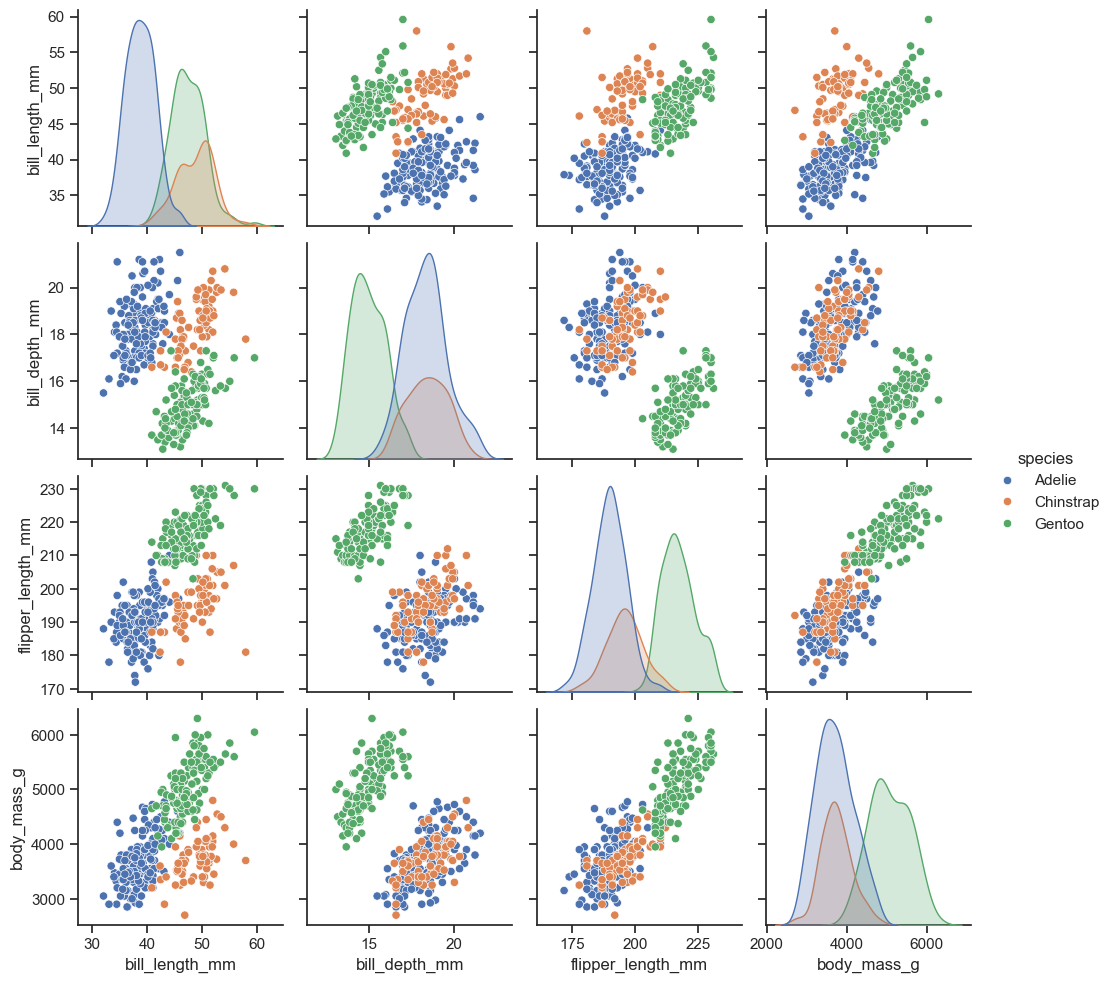

In [118]:
sns.set_theme(style="ticks")

df = sns.load_dataset("penguins")
sns.pairplot(df, hue="species")